ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA) - Housing Data

In this lab, we apply EDA techniques to a US housing sales dataset.

We will explore:
- What each column represents
- Missing values and duplicates
- Data types and basic statistics
- Distributions of key variables (Price, Area, etc.)
- Relationships between variables (e.g., Area vs Price, Bedrooms vs Price)


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

# Load Dataset

In [2]:
# Load the housing sales dataset

df = pd.read_csv("us_house_Sales_data.csv")

# Display first 5 rows
df.head()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

      Price  Address   City  Zipcode  State  Bedrooms  Bathrooms  Area (Sqft)  \
0     False    False  False    False  False     False      False        False   
1     False    False  False    False  False     False      False        False   
2     False    False  False    False  False     False      False        False   
3     False    False  False    False  False     False      False        False   
4     False    False  False    False  False     False      False        False   
...     ...      ...    ...      ...    ...       ...        ...          ...   
2995  False    False  False    False  False     False      False        False   
2996  False    False  False    False  False     False      False        False   
2997  False    False  False    False  False     False      False        False   
2998  False    False  False    False  False     False      False        False   
2999  False    False  False    False  False     False      False        False   

      Lot Size  Year Built 

In [4]:
# Count missing values per column
df.isna().sum()

Price             0
Address           0
City              0
Zipcode           0
State             0
Bedrooms          0
Bathrooms         0
Area (Sqft)       0
Lot Size          0
Year Built        0
Days on Market    0
Property Type     0
MLS ID            0
Listing Agent     0
Status            0
Listing URL       0
dtype: int64

### Check duplicate rows

In [5]:
# Checking duplicate rows
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

### No. of rows and columns

In [6]:
# Finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (3000, 16) 

number of rows:  3000
number of columns:  16


### Data type of columns

In [7]:
# Viewing the data types of columns
df.dtypes

Price               str
Address             str
City                str
Zipcode           int64
State               str
Bedrooms            str
Bathrooms           str
Area (Sqft)         str
Lot Size            str
Year Built        int64
Days on Market    int64
Property Type       str
MLS ID              str
Listing Agent       str
Status              str
Listing URL         str
dtype: object

### Data Cleaning
We will convert text-based numeric columns to proper numeric types: `Price`, `Bedrooms`, `Bathrooms`, `Area (Sqft)`, `Lot Size`, `Year Built`, `Days on Market`.

In [11]:
# Clean Price: remove $ and commas, convert to numeric
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Bedrooms and Bathrooms: keep numeric part before space (e.g., '3 bds' -> 3)
df['Bedrooms'] = (
    df['Bedrooms']
    .astype(str)                      # ensure string
    .str.extract(r'(\d+)')[0]         # take the first captured group
    .astype(float)
)

df['Bathrooms'] = (
    df['Bathrooms']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

# Area (Sqft) and Lot Size: remove ' sqft' and commas, convert to numeric
df['Area (Sqft)'] = (
    df['Area (Sqft)']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(' sqft', '', regex=False)
)
df['Area (Sqft)'] = pd.to_numeric(df['Area (Sqft)'], errors='coerce')

df['Lot Size'] = (
    df['Lot Size']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(' sqft', '', regex=False)
)
df['Lot Size'] = pd.to_numeric(df['Lot Size'], errors='coerce')

# Year Built and Days on Market: convert to numeric
df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce')
df['Days on Market'] = pd.to_numeric(df['Days on Market'], errors='coerce')

df.dtypes

Price               int64
Address               str
City                  str
Zipcode             int64
State                 str
Bedrooms          float64
Bathrooms         float64
Area (Sqft)         int64
Lot Size            int64
Year Built          int64
Days on Market      int64
Property Type         str
MLS ID                str
Listing Agent         str
Status                str
Listing URL           str
dtype: object

### Descriptive summary Statistics

In [12]:
# Statistical summary for all columns
df.describe(include='all')

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
count,3.000000e+03,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000,3000
unique,NaN,3000,5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5,2997,5,3,3000
top,NaN,"5926 Oak Ave, San Diego, CA 65383",Los Angeles,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,Z463266,Alex Johnson - Compass,Sold,https://www.zillow.com/homedetails/80374762_zpid/
freq,NaN,1,617,NaN,659,NaN,NaN,NaN,NaN,NaN,NaN,622,2,617,1045,1
mean,8.108594e+05,NaN,NaN,55264.197333,NaN,3.469667,2.501667,2278.950667,5499.022333,1986.814333,61.199333,NaN,NaN,NaN,NaN,NaN
std,3.997320e+05,NaN,NaN,25923.967932,NaN,1.706278,1.121792,977.406975,2628.573865,21.272252,34.890983,NaN,NaN,NaN,NaN,NaN
min,1.002830e+05,NaN,NaN,10006.000000,NaN,1.000000,1.000000,600.000000,1000.000000,1950.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4.703870e+05,NaN,NaN,33363.500000,NaN,2.000000,1.000000,1440.750000,3183.500000,1968.000000,31.000000,NaN,NaN,NaN,NaN,NaN
50%,8.156300e+05,NaN,NaN,55467.500000,NaN,3.000000,2.000000,2274.500000,5543.500000,1987.000000,62.000000,NaN,NaN,NaN,NaN,NaN
75%,1.158188e+06,NaN,NaN,77692.250000,NaN,5.000000,4.000000,3111.000000,7799.000000,2006.000000,91.000000,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis: Distribution of Price

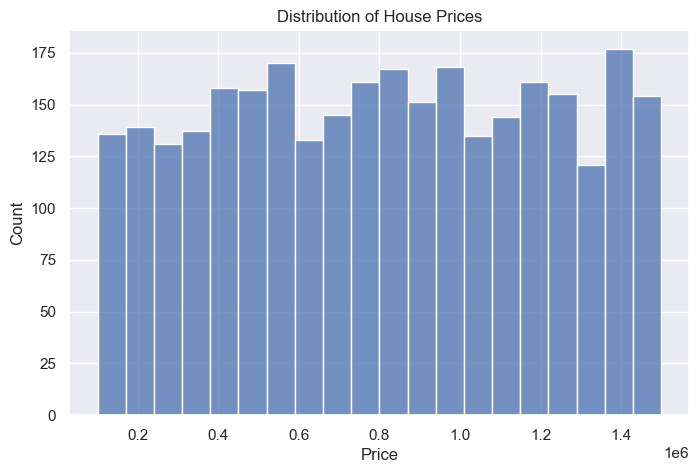

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

### Univariate Analysis: Area (Sqft) and Days on Market

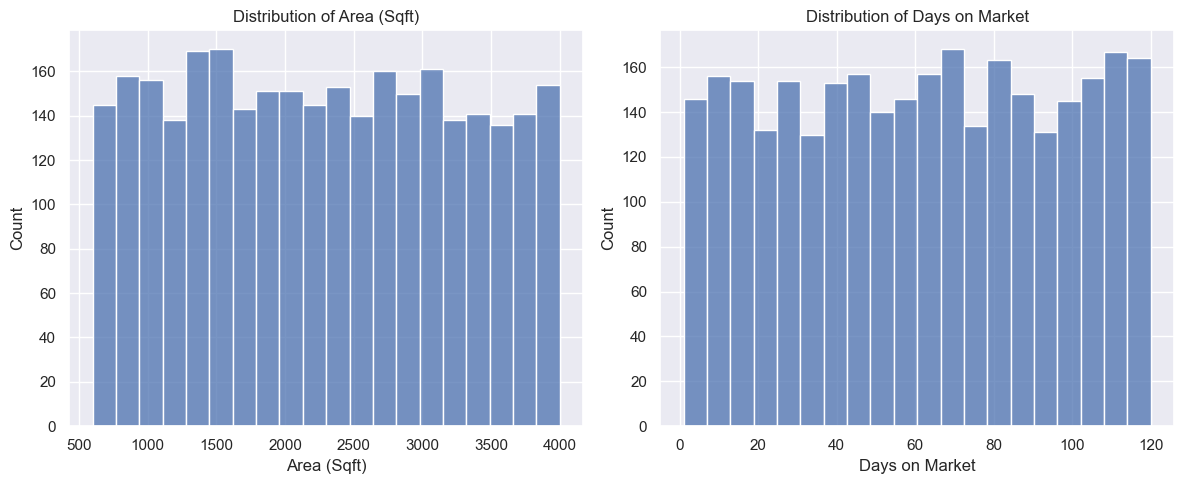

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['Area (Sqft)'], bins=20, ax=axes[0])
axes[0].set_title('Distribution of Area (Sqft)')

sns.histplot(df['Days on Market'], bins=20, ax=axes[1])
axes[1].set_title('Distribution of Days on Market')

plt.tight_layout()
plt.show()

## Bivariate Analysis

### Average Price by City

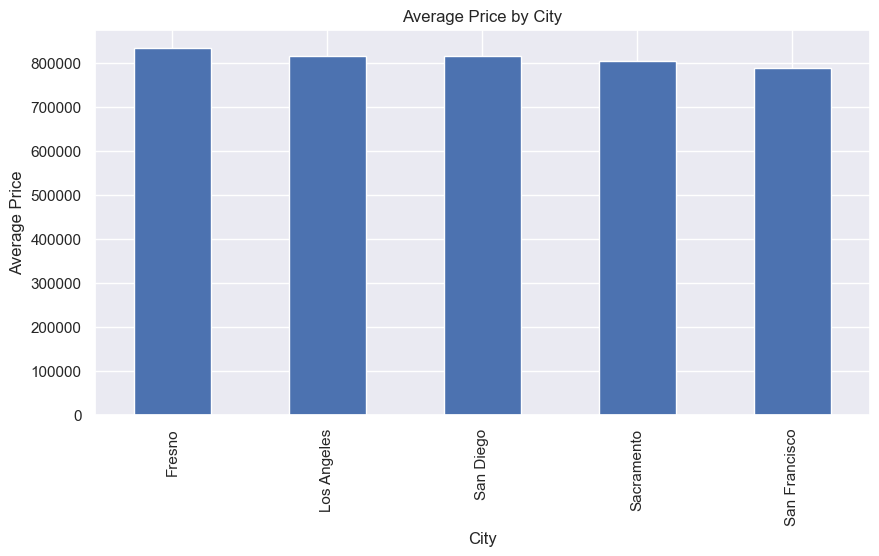

City
Fresno           833497.569468
Los Angeles      815039.320908
San Diego        814489.254266
Sacramento       804244.180624
San Francisco    787924.528926
Name: Price, dtype: float64

In [15]:
city_price = df.groupby('City')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
city_price.plot(kind='bar')
plt.title('Average Price by City')
plt.ylabel('Average Price')
plt.show()

city_price

### Average Price by Property Type

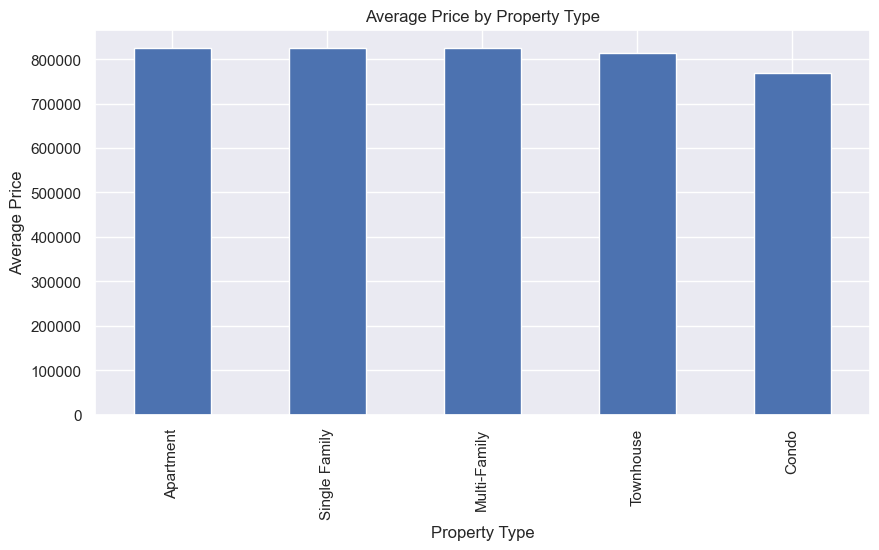

Property Type
Apartment        825628.620579
Single Family    824646.214408
Multi-Family     824386.867021
Townhouse        813447.346906
Condo            768002.405186
Name: Price, dtype: float64

In [16]:
ptype_price = df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ptype_price.plot(kind='bar')
plt.title('Average Price by Property Type')
plt.ylabel('Average Price')
plt.show()

ptype_price

### Area vs Price Relationship

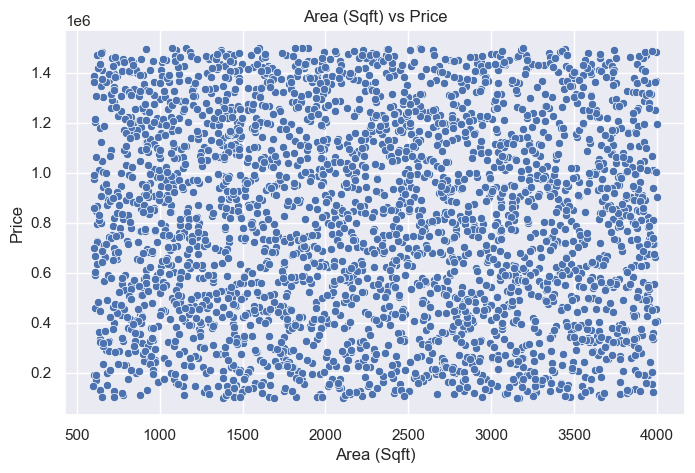

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Area (Sqft)', y='Price', data=df)
plt.title('Area (Sqft) vs Price')
plt.show()

### Bedrooms vs Price Relationship

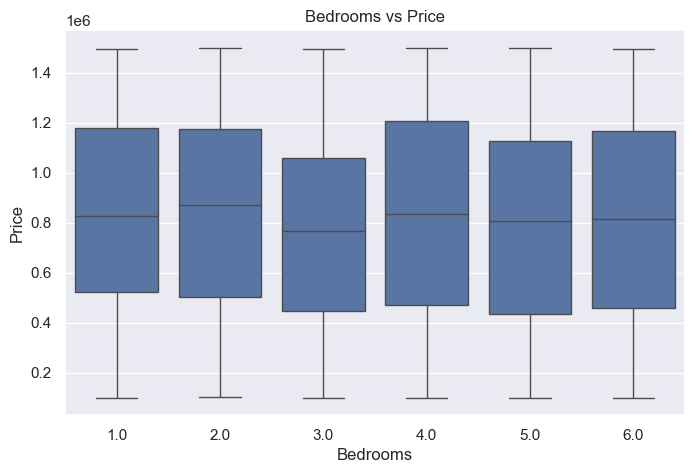

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')
plt.show()

### Correlation Matrix (Numeric Features)

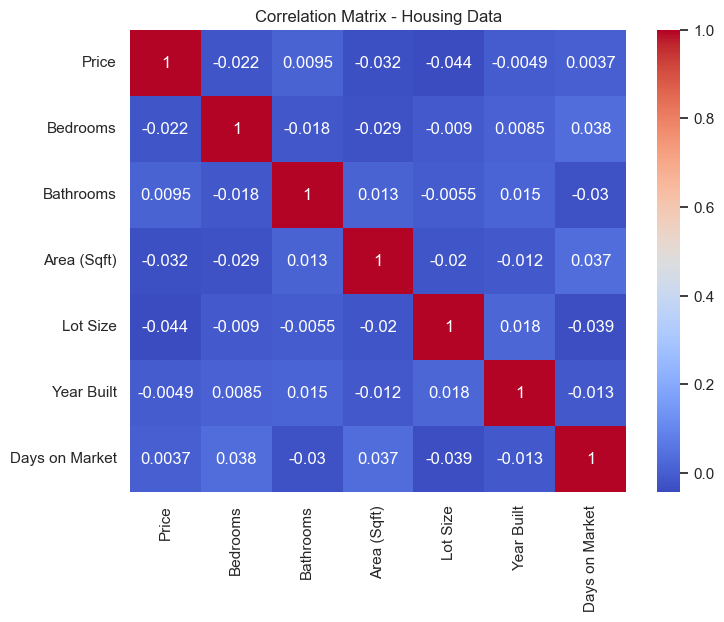

In [19]:
numeric_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Area (Sqft)', 'Lot Size', 'Year Built', 'Days on Market']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Housing Data')
plt.show()